# Chapter 1 Financial Time Series and Their Characteristics

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
#import scipy as scipy
import scipy

pd.options.display.float_format = '{:,.2f}'.format


In [2]:
size=15

params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}

plt.rcParams.update(params)

# One-Period Simple Return

In [3]:
# set up the print config
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 80

In [4]:
%precision 2

def print_array(text, my_array):
    print(text , ['{:.2f}'.format(item) for item in my_array], "\n")    

# asset price
P_t=[1,2,3,2,2.5,3,3.6,3]
print_array("asseset price: ", P_t)

# simple net return or simple return
R_t = []
for k in range(1, len(P_t)):
    simple_return = P_t[k]/P_t[k-1]-1
    R_t.append(simple_return)
print_array("simple return: ", R_t)

# multiple period return
multi_period_return = 1
multi_period_return = [multi_period_return*(1+x) for x in R_t]
print_array("multiple period returns are: " , multi_period_return)

# annualized (average ) return
pair = [(multi_period_return[k], k) for k in range(1,len(multi_period_return))]

anualized_return = [np.power(p[0],1.0/p[1])-1 for p in pair]
print_array("anualized_return are: " , anualized_return)


asseset price:  ['1.00', '2.00', '3.00', '2.00', '2.50', '3.00', '3.60', '3.00'] 

simple return:  ['1.00', '0.50', '-0.33', '0.25', '0.20', '0.20', '-0.17'] 

multiple period returns are:  ['2.00', '1.50', '0.67', '1.25', '1.20', '1.20', '0.83'] 

anualized_return are:  ['0.50', '-0.18', '0.08', '0.05', '0.04', '-0.03'] 



# Continuously Compounded Return

In [5]:
# simple net return or simple return
P_t=[1,2,3,2,2.5,3,3.6,3]

r_t = []
for k in range(1, len(P_t)):
    simple_return = np.log(P_t[k]/P_t[k-1])
    r_t.append(simple_return)
print_array("simple return: ", r_t)


simple return:  ['0.69', '0.41', '-0.41', '0.22', '0.18', '0.18', '-0.18'] 



# Portfolio Return
## The simple net return of a portfolio consisting of N assets is a weighted average
## of the simple net returns of the assets involved, where the weight on each asset is
## the percentage of the portfolio’s value invested in that asset. Let


In [6]:
# assume we have some protfolio with their return

# name, value, individual return rate
portfolio=[["Amazon", 100000, 25/100.0],
           ["House", 1e6, 12.5/100.0],
           ["Apple", 50000, 30/100.0],
           ["DoorDash", 20000, -50/100.0],
           ["Bitcoine", 100000, -40/100.0]]
           
print(portfolio)
portfolio_total = sum([x[1] for x in portfolio])
portfolio_return = sum([x[1]/portfolio_total*x[2] for x in portfolio]) #normalize the value, multiple by the return

print('portfolio_return is {:.2f}'.format(portfolio_return))

[['Amazon', 100000, 0.25], ['House', 1000000.0, 0.125], ['Apple', 50000, 0.3], ['DoorDash', 20000, -0.5], ['Bitcoine', 100000, -0.4]]
portfolio_return is 0.09


# Dividend Payment

In [7]:
# assuming we have dividents from those three stocks.
divident = {"Amazon":10000, "Apple":1000, "DoorDash":0}
# update the return rate
update_portfolio=[]
for x in portfolio:
    
    if x[0] in divident.keys():
        #compute new return rate
        new_asset =  x[1]+divident[x[0]]
        original_return_in_value = x[1]*x[2]
        return_rate = (original_return_in_value +divident[x[0]])/new_asset #total return/total_new_asset
        update_portfolio.append([x[0], new_asset, return_rate])
    else:
        update_portfolio.append(x)

print("updated portfolio ", update_portfolio, "\n")

portfolio_total = sum([x[1] for x in update_portfolio])
portfolio_return = sum([x[1]/portfolio_total*x[2] for x in update_portfolio]) #normalize the value, multiple by the return

print('portfolio_return with divident is {:.2f}'.format(portfolio_return))    
    
# If you have a sequence of asset. just use this approach to compute them periodically.

updated portfolio  [['Amazon', 110000, 0.3181818181818182], ['House', 1000000.0, 0.125], ['Apple', 51000, 0.3137254901960784], ['DoorDash', 20000, -0.5], ['Bitcoine', 100000, -0.4]] 

portfolio_return with divident is 0.10


In [8]:
# load data on Page 10, IBM stock
df = pd.read_csv(r'data\d-ibm3dx7008.txt', sep=r"[\f\n\r\t\v]", header=0, engine='python')
df = df.dropna()

In [9]:
df.columns

Index(['Date', '          rtn', '        vwretd  ', 'ewretd  ', 'sprtrn'], dtype='object')

In [10]:
df = df.rename(columns={'          rtn': 'rtn', '        vwretd  ': 'vwretd', "ewretd  ":"ewretd"})
df.describe()
df = df *100

In [11]:
# no R equivalent of basicStats
df.describe()

,rtn,vwretd,ewretd,sprtrn
count,"9,843.00","9,843.00","9,843.00","9,843.00"
mean,0.04,0.04,0.08,0.03
std,1.69,1.00,0.81,1.06
min,-22.96,-17.13,-10.39,-20.47
25%,-0.86,-0.43,-0.26,-0.49
50%,0.00,0.07,0.14,0.04
75%,0.88,0.53,0.47,0.55
max,13.16,11.52,10.74,11.58


<Figure size 4000x1600 with 0 Axes>

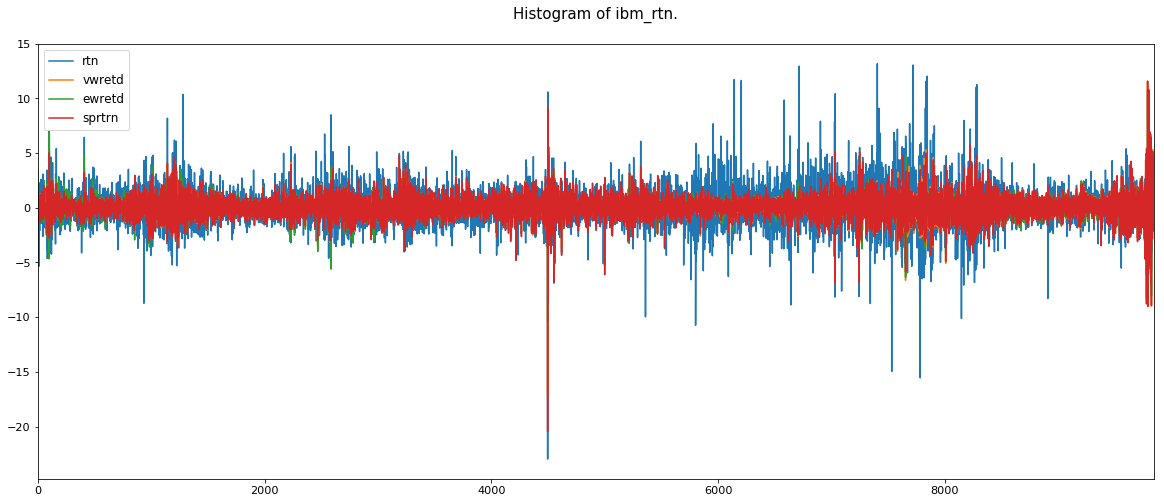

<Figure size 1440x576 with 0 Axes>

In [12]:
fig = plt.figure(dpi=200)
df.plot()
plt.title('Histogram of ibm_rtn.')
plt.show()
plt.tight_layout()

In [13]:
import scipy.stats as stats

skew = stats.skew(df['rtn'])
print("skewness is {}".format(skew))

t1  = skew/np.sqrt(6.0/len(df))
print("T test {}".format(t1))

# compute p-value
pv=2*(1-stats.norm.cdf(t1)) 
print("p-value is {}".format(pv))

skewness is 0.06138744553836801
T test 2.486381004509499
p-value is 0.012904971978547453


In [14]:
#Turn to log returns in percentages
libm=np.log(df['rtn']+1)*100
#t.test(libm) % Test mean being zero.
#One Sample t-test


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


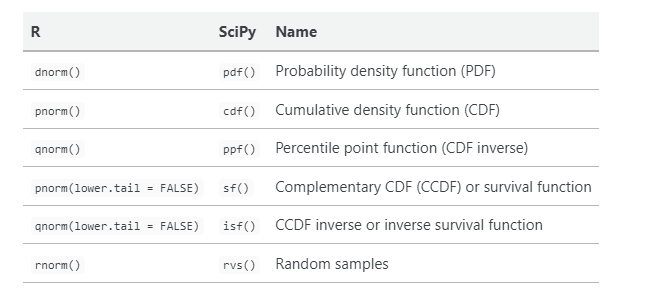

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA0BA708D0>,
      dtype=object)

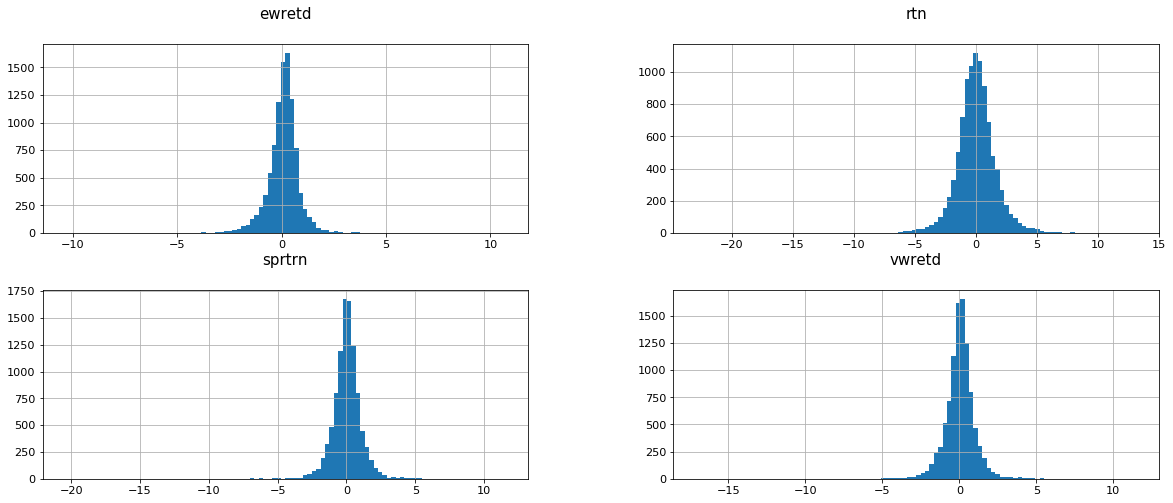

In [15]:
df.hist( bins=100)

In [16]:
libm.describe()

count   7,721.00
mean        -inf
std          nan
min         -inf
25%       -31.88
50%        29.69
75%        76.31
max       265.07
Name: rtn, dtype: float64

In [19]:
# student't-Test
tstatics, pval = stats.ttest_1samp(libm, 0)
print(f"tStatics = {tstatics:.10f}\nP-Value = {pval:.10f}")
if pval > 0.05:
    print("Cann't reject the NULL hypothesis at the 5% significance level.")
else:
    print("Reject the NULL hypothesis at the 5% significance level.")

tStatics = nan
P-Value = nan
Reject the NULL hypothesis at the 5% significance level.


In [21]:
import statsmodels.api as sm

chiStatics, pval, *_ = sm.stats.stattools.jarque_bera(libm)
print(f"chiStatics = {chiStatics:.10f}\nP-Value = {pval:.10f}")
if pval > 0.05:
    print("Cann't reject the NULL hypothesis at the 5% significance level.")
else:
    print("Reject the NULL hypothesis at the 5% significance level.")

chiStatics = nan
P-Value = nan
Reject the NULL hypothesis at the 5% significance level.


C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Captial Assest Pricing Model (CAPA)
https://www.investopedia.com/terms/c/capm.asp

# A good stats python package

In [22]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.90e-08
Time:                        15:57:46   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     